The database of election has 8 readings of 8 sensors reading muscle activity by Electromyography. The last column classifies the gesture in one of each: rock - 0, scissors - 1, paper - 2, ok - 3. This dataset can be used to map user residual muscle gestures to certain actions of a prosthetic such as open/close hand or rotate wrist.

Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Opening data files

In [2]:
zero=pd.read_csv('./emg-4/0.csv')
one=pd.read_csv('./emg-4/1.csv')
two=pd.read_csv('./emg-4/2.csv')
three=pd.read_csv('./emg-4/3.csv')
pd.set_option('display.max_columns', None)  
display(zero.head(), one.head(),two.head(),three.head())

,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0.1,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0.1,-9.0.1,27.0,20.0,91.0,71.0,-26.0,-1.0.2,0.0,1.0,13.0.1,20.0.1,-62.0,-19.0,29.0,2.0.1,2.0.2,0.0.1,-23.0,-1.0.3,-80.0,4.0.2,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0.1,1.0.1,1.0.2,13.0.2,-8.0.1,-11.0.1,21.0,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,-2.0,-4.0,6.0,61.0,84.0,70.0,23.0,4.0,2.0,8.0,4.0,14.0,-71.0,13.0,-46.0,-3.0,-6.0,-3.0,-8.0,-16.0,-99.0,-37.0,14.0,-1.0,0.0,2.0,-4.0,-16.0,13.0,-7.0,-23.0,-4.0,5.0,16.0,4.0,-7.0,21.0,-16.0,47.0,-2.0,-7.0,-28.0,13.0,-11.0,22.0,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


,-7.0,-1.0,-1.0.1,0.0,-10.0,-10.0.1,-1.0.2,1.0,-5.0,-5.0.1,-4.0,-2.0,-17.0,-17.0.1,-5.0.2,-5.0.3,10.0,2.0,-1.0.3,-3.0,8.0,5.0,0.0.1,-1.0.4,-3.0.1,-4.0.1,-4.0.2,-3.0.2,15.0,24.0,-1.0.5,-6.0,-7.0.1,-3.0.3,-4.0.3,-4.0.4,13.0,60.0,3.0,8.0.1,-7.0.2,4.0,6.0,5.0.1,-36.0,-56.0,-3.0.4,-5.0.4,-6.0.1,0.0.2,2.0.1,2.0.2,-4.0.5,-16.0,2.0.3,6.0.1,-4.0.6,-3.0.5,-5.0.5,-3.0.6,15.0.1,11.0,-4.0.7,-5.0.6,1
0,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,-1.0,-1.0,-3.0,2.0,-1.0,-10.0,-35.0,-2.0,4.0,6.0,-16.0,-12.0,-1.0,0.0,47.0,8.0,4.0,-2.0,-20.0,-23.0,0.0,8.0,-8.0,-1.0,-2.0,-2.0,12.0,-1.0,-2.0,-6.0,3.0,-1.0,2.0,-3.0,16.0,15.0,-5.0,-7.0,-2.0,-4.0,-3.0,0.0,-7.0,-7.0,1.0,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
1,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,-6.0,-4.0,-3.0,10.0,3.0,-3.0,-1.0,0.0,4.0,6.0,-29.0,-38.0,2.0,12.0,7.0,1.0,0.0,-2.0,19.0,23.0,2.0,3.0,-3.0,1.0,-3.0,-2.0,-9.0,7.0,-4.0,1.0,3.0,1.0,0.0,-3.0,9.0,3.0,-1.0,2.0,-13.0,-8.0,1.0,1.0,-7.0,2.0,-5.0,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
2,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,1.0,1.0,8.0,26.0,0.0,3.0,16.0,-6.0,-8.0,-9.0,-8.0,-2.0,-9.0,-13.0,-16.0,-4.0,1.0,4.0,-14.0,-17.0,2.0,6.0,-23.0,0.0,2.0,0.0,-6.0,-6.0,1.0,-10.0,23.0,3.0,-1.0,-2.0,-2.0,-9.0,-1.0,6.0,-10.0,3.0,3.0,1.0,15.0,10.0,0.0,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
3,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,-4.0,-4.0,11.0,14.0,-3.0,-3.0,-9.0,5.0,-1.0,0.0,-4.0,-17.0,-1.0,-3.0,9.0,-4.0,-5.0,-5.0,22.0,27.0,-4.0,0.0,-3.0,-3.0,-4.0,-3.0,27.0,45.0,-5.0,-5.0,-8.0,9.0,8.0,10.0,-25.0,-66.0,9.0,6.0,-9.0,-10.0,-4.0,-4.0,-8.0,0.0,2.0,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
4,-8.0,-3.0,-1.0,0.0,14.0,5.0,-4.0,-6.0,2.0,0.0,-1.0,0.0,-5.0,7.0,0.0,2.0,5.0,9.0,1.0,-1.0,11.0,17.0,1.0,-3.0,7.0,0.0,-3.0,-2.0,-16.0,-24.0,-2.0,13.0,-3.0,-1.0,-2.0,1.0,-14.0,-1.0,5.0,-2.0,2.0,-1.0,0.0,-2.0,-2.0,-9.0,-5.0,3.0,-26.0,-4.0,2.0,-2.0,0.0,18.0,0.0,-18.0,53.0,8.0,-1.0,-1.0,-2.0,-5.0,-2.0,9.0,1


,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,-2.0,-9.0.1,15.0,-23.0.1,-11.0,-2.0.1,11.0,27.0,-3.0.1,-12.0,-22.0,-34.0,-16.0,-2.0.2,-10.0,-9.0.2,3.0.1,5.0,41.0,-33.0,19.0.1,1.0,5.0.1,0.0,-2.0.3,-6.0.1,-12.0.1,63.0,-7.0.1,-3.0.2,-11.0.1,-15.0,4.0.1,12.0,42.0,12.0.1,-14.0,-20.0,1.0.1,29.0,-2.0.4,-7.0.2,-24.0,-22.0.1,-8.0,9.0,-14.0.1,-2.0.5,-3.0.3,-4.0,-21.0.1,7.0,-8.0.1,-12.0.2,2
0,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,-14.0,-4.0,-16.0,-12.0,-6.0,0.0,-2.0,-30.0,13.0,17.0,20.0,82.0,0.0,6.0,7.0,-10.0,-4.0,-11.0,-41.0,-75.0,-20.0,-13.0,-13.0,-2.0,-2.0,11.0,44.0,77.0,37.0,1.0,7.0,28.0,12.0,9.0,5.0,0.0,8.0,7.0,8.0,-19.0,-13.0,-10.0,-5.0,-51.0,-19.0,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
1,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,7.0,-4.0,-27.0,-27.0,10.0,9.0,1.0,13.0,-7.0,-9.0,-29.0,-33.0,-16.0,7.0,14.0,-12.0,5.0,13.0,67.0,43.0,10.0,9.0,-6.0,-1.0,-9.0,-8.0,-43.0,-21.0,-13.0,-16.0,-14.0,-77.0,-5.0,8.0,15.0,88.0,19.0,-4.0,8.0,-3.0,-11.0,-4.0,-3.0,-34.0,-13.0,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
2,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,-1.0,-1.0,19.0,-2.0,-1.0,-5.0,1.0,5.0,3.0,8.0,-4.0,4.0,-1.0,-18.0,-10.0,-21.0,-4.0,-7.0,-22.0,53.0,10.0,5.0,4.0,-2.0,-13.0,-7.0,24.0,24.0,29.0,4.0,6.0,9.0,5.0,4.0,-44.0,-52.0,-23.0,-6.0,-8.0,0.0,-9.0,-12.0,11.0,-65.0,-27.0,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
3,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,1.0,3.0,37.0,29.0,7.0,-15.0,0.0,-5.0,1.0,-4.0,1.0,-36.0,-13.0,1.0,9.0,24.0,3.0,1.0,2.0,5.0,-6.0,8.0,-6.0,-7.0,-22.0,-9.0,-12.0,66.0,2.0,-8.0,2.0,-13.0,9.0,1.0,0.0,4.0,0.0,11.0,1.0,-26.0,-2.0,0.0,5.0,5.0,5.0,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2
4,3.0,-3.0,-6.0,-5.0,-3.0,-4.0,-5.0,-4.0,-5.0,8.0,-6.0,-3.0,17.0,-17.0,2.0,-8.0,5.0,21.0,6.0,7.0,-12.0,-4.0,12.0,-4.0,-4.0,8.0,-10.0,-8.0,-8.0,8.0,3.0,-6.0,-4.0,-31.0,0.0,2.0,-17.0,-70.0,-19.0,7.0,4.0,17.0,5.0,-2.0,-5.0,85.0,38.0,36.0,3.0,2.0,3.0,8.0,8.0,-30.0,7.0,-18.0,-14.0,8.0,1.0,-2.0,-4.0,-34.0,-3.0,6.0,2


,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0.1,0.0,1.0,2.0,-20.0,-51.0,-8.0,-9.0.1,0.0.1,-3.0,-6.0.1,-8.0.1,12.0,7.0,1.0.1,1.0.2,6.0,2.0.1,1.0.3,-3.0.1,-17.0,-15.0,-1.0.1,9.0,15.0,5.0.2,1.0.4,-1.0.2,-4.0,-37.0,-9.0.2,-7.0,4.0,-6.0.2,0.0.2,2.0.2,-3.0.2,-2.0.1,-4.0.1,-3.0.3,-29.0,0.0.3,3.0,6.0.1,7.0.1,12.0.1,7.0.2,-10.0,-15.0.1,-6.0.3,-3.0.4,3.0.1,20.0,25.0,1.0.5,1.0.6,3
0,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,-3.0,-4.0,4.0,-12.0,-9.0,-4.0,16.0,0.0,1.0,-2.0,-4.0,-34.0,0.0,-3.0,-5.0,-4.0,-3.0,-1.0,-12.0,-4.0,-8.0,-16.0,-4.0,1.0,1.0,1.0,2.0,-16.0,8.0,7.0,-7.0,-6.0,-5.0,0.0,37.0,32.0,2.0,4.0,-1.0,7.0,6.0,4.0,-34.0,-40.0,3.0,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3
1,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,2.0,3.0,-9.0,-28.0,12.0,2.0,6.0,13.0,2.0,2.0,3.0,10.0,6.0,8.0,-7.0,-4.0,-4.0,-5.0,-6.0,-15.0,0.0,1.0,-6.0,2.0,3.0,9.0,10.0,19.0,4.0,-12.0,-3.0,-3.0,-5.0,-11.0,-4.0,-69.0,-18.0,-2.0,9.0,-6.0,-1.0,3.0,14.0,90.0,11.0,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3
2,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,-1.0,-7.0,-10.0,2.0,2.0,-3.0,-2.0,-12.0,-8.0,-3.0,-4.0,-61.0,-15.0,-1.0,-27.0,1.0,2.0,2.0,-3.0,13.0,-1.0,-3.0,-2.0,-6.0,-4.0,-4.0,-5.0,0.0,1.0,-2.0,1.0,3.0,1.0,-2.0,-3.0,10.0,-3.0,-13.0,8.0,3.0,3.0,3.0,-2.0,-8.0,6.0,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3
3,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,3.0,2.0,-10.0,-7.0,13.0,5.0,0.0,-3.0,-4.0,-6.0,-7.0,-2.0,-7.0,-11.0,8.0,1.0,-1.0,-1.0,2.0,10.0,-3.0,-10.0,-7.0,0.0,-3.0,-2.0,-8.0,-35.0,-2.0,20.0,-3.0,-7.0,-1.0,6.0,18.0,106.0,11.0,-1.0,10.0,-2.0,0.0,2.0,24.0,27.0,2.0,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3
4,-11.0,-2.0,-5.0,1.0,-7.0,-11.0,-4.0,-23.0,-9.0,0.0,-1.0,-3.0,-18.0,-26.0,-7.0,4.0,-9.0,0.0,-1.0,-1.0,1.0,42.0,8.0,5.0,8.0,3.0,4.0,7.0,2.0,-3.0,6.0,-8.0,1.0,0.0,0.0,-2.0,-8.0,6.0,-3.0,1.0,5.0,4.0,2.0,-1.0,-11.0,-46.0,-7.0,1.0,-10.0,-9.0,-5.0,-3.0,7.0,-32.0,-20.0,-4.0,9.0,1.0,2.0,8.0,21.0,41.0,15.0,9.0,3


The sensors are named differently according to the gesture movement, they should be named by the sensor name and the reading time, for being able to join both tables in a correct way and for interpretation purposes. (e.g. t1s1,t2s1,t3s1,t4s1,t5s1,t6s1,t7s1,t8s1, t1s2.........t8s8)

In [3]:
ts= ['t'+str(i) for i in range(1,9)]
ss= ['s'+str(i) for i in range(1,9)]
col_names= [j+i for i in ss for j in ts]
col_names.append('gest')

In [4]:
dfs=[zero,one,two,three]
for df in dfs:
    df.columns=col_names

Checking if the column names are correct

In [5]:
zero.head()

,t1s1,t2s1,t3s1,t4s1,t5s1,t6s1,t7s1,t8s1,t1s2,t2s2,t3s2,t4s2,t5s2,t6s2,t7s2,t8s2,t1s3,t2s3,t3s3,t4s3,t5s3,t6s3,t7s3,t8s3,t1s4,t2s4,t3s4,t4s4,t5s4,t6s4,t7s4,t8s4,t1s5,t2s5,t3s5,t4s5,t5s5,t6s5,t7s5,t8s5,t1s6,t2s6,t3s6,t4s6,t5s6,t6s6,t7s6,t8s6,t1s7,t2s7,t3s7,t4s7,t5s7,t6s7,t7s7,t8s7,t1s8,t2s8,t3s8,t4s8,t5s8,t6s8,t7s8,t8s8,gest
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,-2.0,-4.0,6.0,61.0,84.0,70.0,23.0,4.0,2.0,8.0,4.0,14.0,-71.0,13.0,-46.0,-3.0,-6.0,-3.0,-8.0,-16.0,-99.0,-37.0,14.0,-1.0,0.0,2.0,-4.0,-16.0,13.0,-7.0,-23.0,-4.0,5.0,16.0,4.0,-7.0,21.0,-16.0,47.0,-2.0,-7.0,-28.0,13.0,-11.0,22.0,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


Now that the columns are correclty named, the data will be concat into an only dataframe

In [6]:
df = pd.concat([zero, one, two, three], axis=0).reset_index().drop('index',axis=1)

In [7]:
print(df.shape)
df.head()

(11674, 65)


,t1s1,t2s1,t3s1,t4s1,t5s1,t6s1,t7s1,t8s1,t1s2,t2s2,t3s2,t4s2,t5s2,t6s2,t7s2,t8s2,t1s3,t2s3,t3s3,t4s3,t5s3,t6s3,t7s3,t8s3,t1s4,t2s4,t3s4,t4s4,t5s4,t6s4,t7s4,t8s4,t1s5,t2s5,t3s5,t4s5,t5s5,t6s5,t7s5,t8s5,t1s6,t2s6,t3s6,t4s6,t5s6,t6s6,t7s6,t8s6,t1s7,t2s7,t3s7,t4s7,t5s7,t6s7,t7s7,t8s7,t1s8,t2s8,t3s8,t4s8,t5s8,t6s8,t7s8,t8s8,gest
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,-2.0,-4.0,6.0,61.0,84.0,70.0,23.0,4.0,2.0,8.0,4.0,14.0,-71.0,13.0,-46.0,-3.0,-6.0,-3.0,-8.0,-16.0,-99.0,-37.0,14.0,-1.0,0.0,2.0,-4.0,-16.0,13.0,-7.0,-23.0,-4.0,5.0,16.0,4.0,-7.0,21.0,-16.0,47.0,-2.0,-7.0,-28.0,13.0,-11.0,22.0,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


Inspecting dataframe info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11674 entries, 0 to 11673
Data columns (total 65 columns):
t1s1    11674 non-null float64
t2s1    11674 non-null float64
t3s1    11674 non-null float64
t4s1    11674 non-null float64
t5s1    11674 non-null float64
t6s1    11674 non-null float64
t7s1    11674 non-null float64
t8s1    11674 non-null float64
t1s2    11674 non-null float64
t2s2    11674 non-null float64
t3s2    11674 non-null float64
t4s2    11674 non-null float64
t5s2    11674 non-null float64
t6s2    11674 non-null float64
t7s2    11674 non-null float64
t8s2    11674 non-null float64
t1s3    11674 non-null float64
t2s3    11674 non-null float64
t3s3    11674 non-null float64
t4s3    11674 non-null float64
t5s3    11674 non-null float64
t6s3    11674 non-null float64
t7s3    11674 non-null float64
t8s3    11674 non-null float64
t1s4    11674 non-null float64
t2s4    11674 non-null float64
t3s4    11674 non-null float64
t4s4    11674 non-null float64
t5s4    11674 non-null 

In order to know if the groups for column 'gest' (the dependant variable) are distributed in some specific way, a PCA will be made to be able to watch at visual information

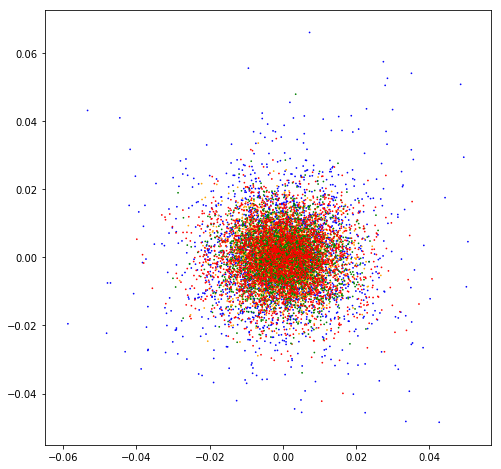

In [9]:
pca = PCA(n_components=2)
distribution_all=pca.fit(df.T) 
plt.figure(figsize=(8,8))
color= ['blue' if gest == 0 
        else 'orange' if gest == 1
        else 'green' if gest == 2
        else 'red' for gest in list(df['gest'])]
plt.scatter(distribution_all.components_[0], distribution_all.components_[1],color=color,s=0.5)

It seems that when taking into account all columns, there is no specific distribution. A search for relevant columns should be made in order to be able to make any model with the data. The first step is to search for posible correlations to drop highly correlated columns 

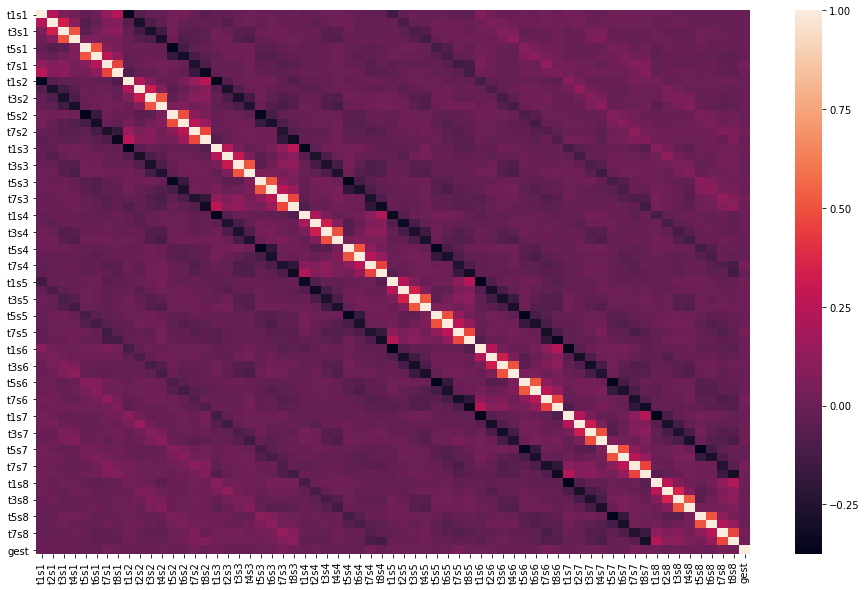

In [10]:
correl = df.corr()
plt.figure(figsize = (16,10))
sns.heatmap(correl)

There is no high correlation between the variables, so we don't need to take out any of them. The next step is to analize if the data is normally distributed, and if there is homoscedasticity. Even if we have enough information to skip this step, it is a good practice to look at it. 

In [11]:
k2, p_norm = stats.normaltest(df)
not_normal=[i for i in p_norm if i<0.05]

levene = []
for col in col_names:      

    l,p = (stats.levene(df[col][df['gest']==0], 
            df[col][df['gest']==1],
            df[col][df['gest']==2], 
            df[col][df['gest']==3],
            )) 
    levene.append((col, p))

not_homocedasticity=[i for i in p_norm if i<0.05]
print(len(not_homocedasticity),len(not_normal))

65 65


/usr/local/lib/python3.7/site-packages/scipy/stats/morestats.py:2345: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


The data is not normalized, neither has homocedasticity. However, there are 11674 samples, so this analysis is only for informational purposes. Test should be made in order to understand which ones are the relevant variables. Since we have a categorical variable depending on continuous variables, an ANOVA can be made. (The test of whether normalizing and standardizing improves the model has been made, but it seems that it worsens it)

In [12]:
anova = []
for col in col_names:      

    a = (stats.f_oneway(df[col][df['gest']==0], 
            df[col][df['gest']==1],
            df[col][df['gest']==2], 
            df[col][df['gest']==3],
            )) 
    anova.append((col, a))
    
significant_columns=[i[0] for i in anova if i[1][1]<0.05]
significant_columns

['t7s1', 't7s2', 't7s3', 't7s4', 't7s5', 't7s6', 't7s7', 't7s8', 'gest']

The columns above are the relevant ones, that is, the ones that are going to be used in the model. Also, the data will be shuffled since now is ordered due to the concatenation.

In [13]:
df_for_model=df[significant_columns]
df_for_model = shuffle(df_for_model) 
df_for_model.head()

,t7s1,t7s2,t7s3,t7s4,t7s5,t7s6,t7s7,t7s8,gest
6073,13.0,-16.0,4.0,-7.0,6.0,2.0,1.0,2.0,2
5343,-5.0,2.0,-1.0,-2.0,-3.0,1.0,-2.0,0.0,1
10557,9.0,-7.0,-13.0,10.0,-5.0,1.0,-2.0,-7.0,3
4707,4.0,0.0,-1.0,1.0,-3.0,1.0,-2.0,3.0,1
3796,-1.0,1.0,-4.0,-2.0,4.0,-2.0,-6.0,-3.0,1


A PCA will be made again in order to see if now that there are only the relevant columns left, there is some organization of the data depending on groups. 

array([[-4.04455674e-03,  2.70372427e-05,  1.31772197e-03, ...,
        -2.07209344e-03, -9.30616919e-04,  8.84646191e-03],
       [-9.19966917e-05,  2.04039352e-04, -5.37252993e-03, ...,
        -3.80755029e-03,  1.67627431e-03, -2.29059212e-02]])

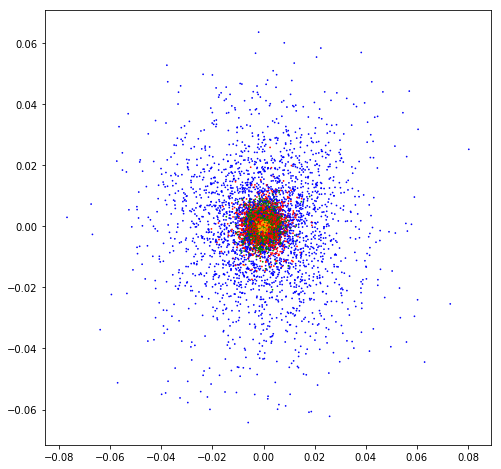

In [14]:
p=pca.fit(df_for_model.loc[:,df_for_model.columns!='gest'].T) 
color= ['blue' if gest == 0 
        else 'orange' if gest == 1
        else 'green' if gest == 2
        else 'red' for gest in list(df_for_model['gest'])]
plt.figure(figsize=(8,8))
plt.scatter(p.components_[0], p.components_[1],color=color,s=0.5)
p.components_

Great. Now the categorical groups can be distinguished. It seems that the problem is non-linear, so the linear classifiers should not be used since the categories are not linearly separable. The next step is to separate the data into train data and test data.

In [15]:
X=df_for_model.loc[:,df_for_model.columns!='gest']
y=df_for_model['gest']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

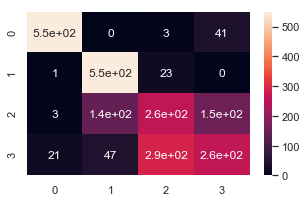

(None,
 'Accuracy Score:0.6907922912205567',
 'It took 0.2981266975402832 seconds to perform')

In [23]:
start = time.time()
gnb = GaussianNB()
fitting = gnb.fit(x_test,y_test)
y_pred = gnb.predict(x_test)
    
acc = accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
fig=sns.heatmap(df_cm, annot=True)

plt.show(),'Accuracy Score:'+str(acc),'It took ' +str(time.time()-start)+' seconds to perform'

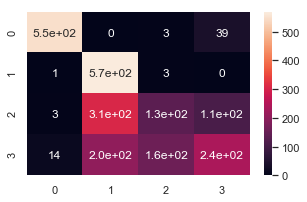

(None,
 'Accuracy Score:0.6385438972162741',
 'It took 0.44507694244384766 seconds to perform')

In [24]:
start = time.time()
svc = SVC(kernel='rbf', gamma='scale')
fitting = svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)
    
acc = accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
fig=sns.heatmap(df_cm, annot=True)
plt.show(),'Accuracy Score:'+str(acc),'It took ' +str(time.time()-start)+' seconds to perform'

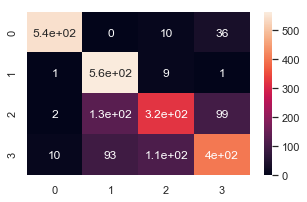

(None,
 'Accuracy Score:0.7845824411134904',
 'It took 0.5239598751068115 seconds to perform')

In [25]:
start = time.time()
kn = KNeighborsClassifier(n_neighbors=3)
fitting = kn.fit(x_test,y_test)
y_pred = kn.predict(x_test)
    
acc = accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
fig=sns.heatmap(df_cm, annot=True)
plt.show(),'Accuracy Score:'+str(acc),'It took ' +str(time.time()-start)+' seconds to perform'

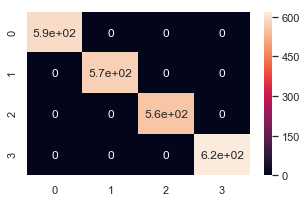

(None, 'Accuracy Score:1.0', 'It took 0.5672469139099121 seconds to perform')

In [26]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100,random_state=0)
fitting = rf.fit(x_test,y_test)
y_pred = rf.predict(x_test)
    
acc = accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
fig=sns.heatmap(df_cm, annot=True)
plt.show(),'Accuracy Score:'+str(acc),'It took ' +str(time.time()-start)+' seconds to perform'

Defining a function to plot models:

In [27]:
def plot_models(model):
    fig = plt.figure(figsize=(6,6))
    value = 1.5
    width = 0.75
    plot_decision_regions(x_train.values, y_train.values, clf=model, legend=2, 
                      filler_feature_values={2: value, 3: value,
                                             4: value, 5: value, 6: value,7: value},
                      filler_feature_ranges={2: width, 3: width,
                                             4: width, 5: width, 6: width, 7: width})
    return plt.show()

Plotting models to understand distributions: 

GaussianNB(priors=None, var_smoothing=1e-09)


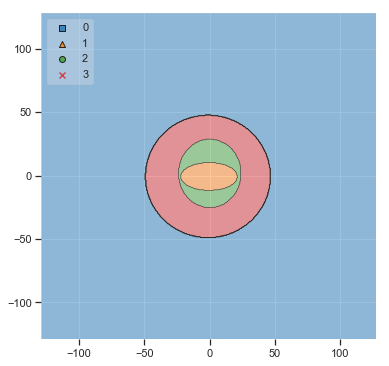

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


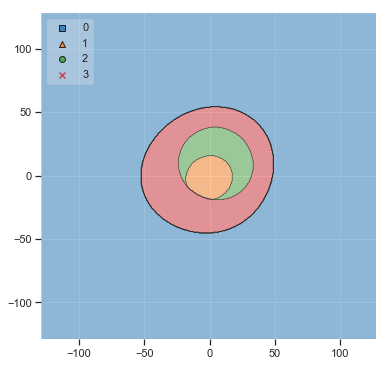

GaussianNB(priors=None, var_smoothing=1e-09)


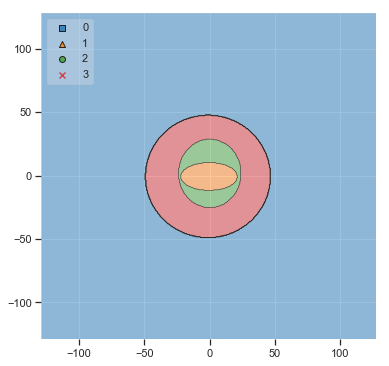

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


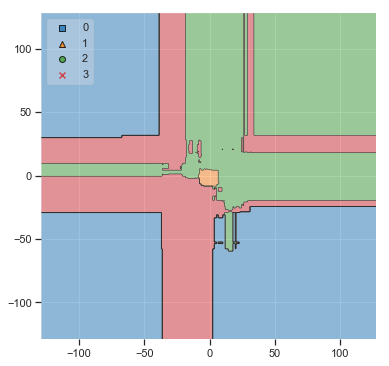

In [23]:
models= [gnb,
         svc, 
         gnb, 
         rf, 
         ]
for model in models: 
    print(model)
    plot_models(model)

Although RandomForest is 100% accurate, lets try a param_grid to learn the tecnique

In [34]:
param_grid = {'n_estimators': [10, 100, 500], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [None,4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

rf = RandomForestClassifier(n_estimators=100,random_state=0)
fitting = rf.fit(x_test,y_test)

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500}

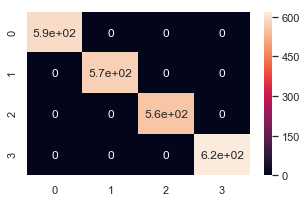

(None, 'Accuracy Score:1.0', 'It took 2.1155612468719482 seconds to perform')

In [35]:
start = time.time()
rf = RandomForestClassifier(n_estimators= 500)
fitting = rf.fit(x_test,y_test)
y_pred = rf.predict(x_test)
    
acc = accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
fig=sns.heatmap(df_cm, annot=True)
plt.show(),'Accuracy Score:'+str(acc),'It took ' +str(time.time()-start)+' seconds to perform'

Grid search does not seem to be usefull in this case, it worsens the performing time. 